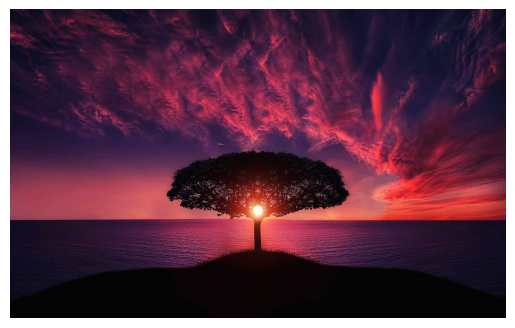

In [1]:
#Program to read image from url
import requests
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

# Example URL of an image
url = 'https://cdn.pixabay.com/photo/2015/04/23/22/00/tree-736885_1280.jpg'
# Download the image
response = requests.get(url)
response.raise_for_status()

# Open the image
image = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

(-0.5, 799.5, 999.5, -0.5)

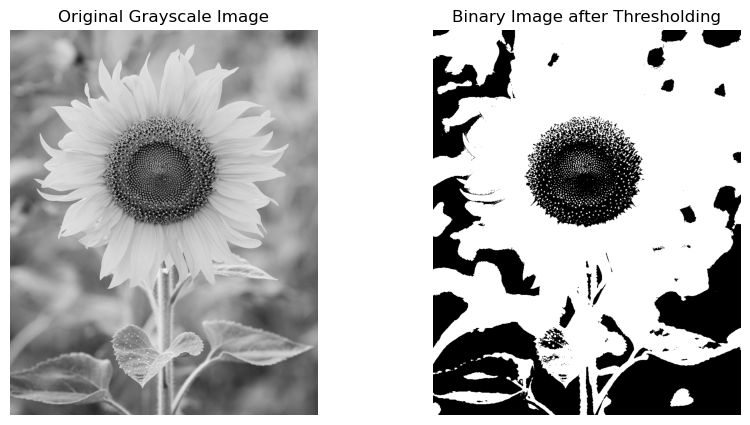

In [5]:
#program to implement global thresholding without built-in
import numpy as np
import matplotlib.pyplot as plt
import cv2

def global_thresholding(image, threshold_value):
    binary_image = np.zeros_like(image)
    height, width = image.shape
    
    for i in range(height):
        for j in range(width):
            if image[i, j] > threshold_value:
                binary_image[i, j] = 255
            else:
                binary_image[i, j] = 0
    
    return binary_image

image_path = 'sunflower.jfif'
manual_threshold = 127

# Load the image
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply global thresholding
binary_image = global_thresholding(original_image, manual_threshold)

plt.figure(figsize=[10, 5])
    
plt.subplot(1, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(original_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Binary Image after Thresholding")
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

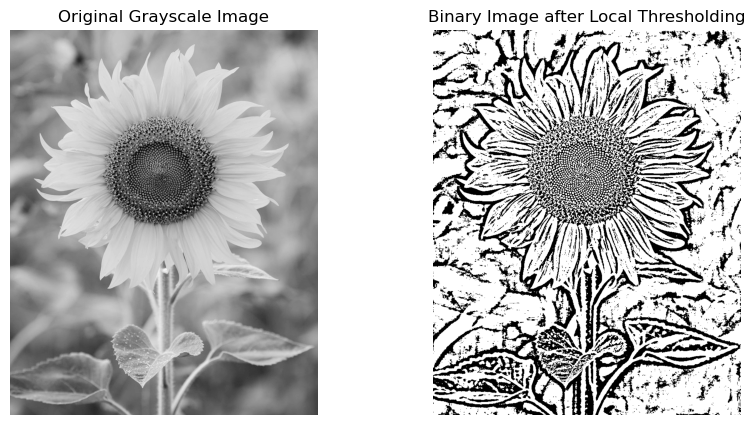

In [2]:
#program to implement local thresholding with built-in
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Block size for local thresholding (must be odd and greater than 1)
block_size = 16  # You can adjust this value as needed
if block_size % 2 == 0:  # Ensure block size is odd
    block_size += 1

# Load the image
image_path = 'sunflower.jfif'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

C = 2

# Apply local thresholding
binary_image = cv2.adaptiveThreshold(original_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,block_size,C)

# Display the images
plt.figure(figsize=[10, 5])

plt.subplot(1, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(original_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Binary Image after Local Thresholding")
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.show()

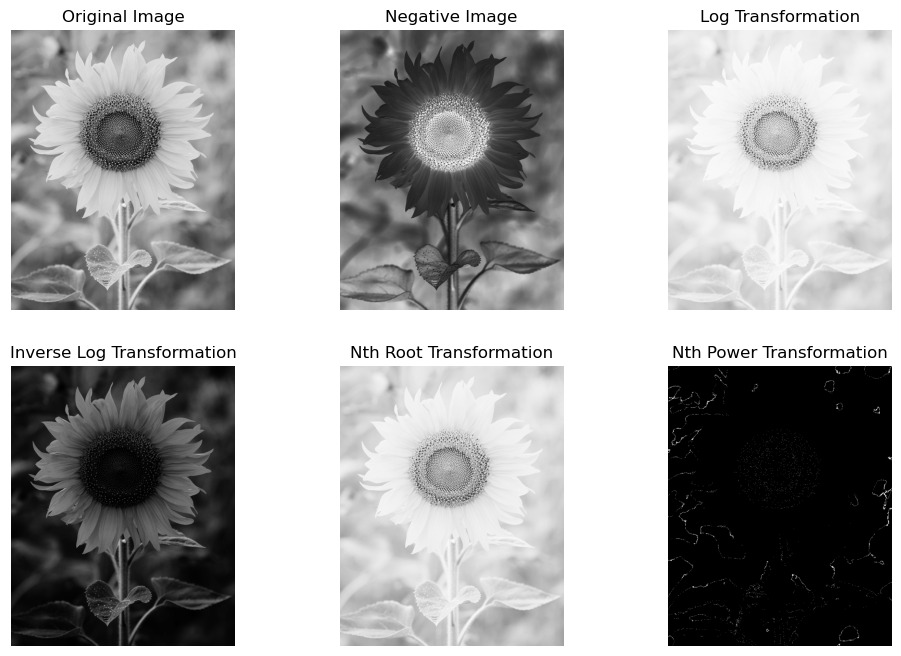

In [1]:
#program to implement basic transformation
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('sunflower.jfif',0)

# 1. Negative Image
negative_image = 255 - image

# 2. Log Transformation
c = 255 / np.log(1 + np.max(image))
log_image = c * (np.log(1 + image))

# 3. Inverse Log Transformation
inverse_log_image = np.exp(image / c) - 1

# 4. Nth Root Transformation
n = 3  # Example for square root
nth_root_image = np.power(image, 1/n)

# 5. Nth Power Transformation
nth_power_image = np.power(image, n)


# Normalize images to the range 0-255 for display
log_image = np.uint8(log_image)
inverse_log_image = np.uint8(inverse_log_image)
nth_root_image = np.uint8(255 * nth_root_image / np.max(nth_root_image))
nth_power_image = np.uint8(255 * nth_power_image / np.max(nth_power_image))

# Display images
titles = ['Original Image', 'Negative Image', 'Log Transformation', 
          'Inverse Log Transformation', 'Nth Root Transformation', 'Nth Power Transformation']

images = [image, negative_image, log_image, inverse_log_image, nth_root_image, nth_power_image]

plt.figure(figsize = (12,8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    plt.axis('off') 
plt.show()

Enter kernel size :: 5


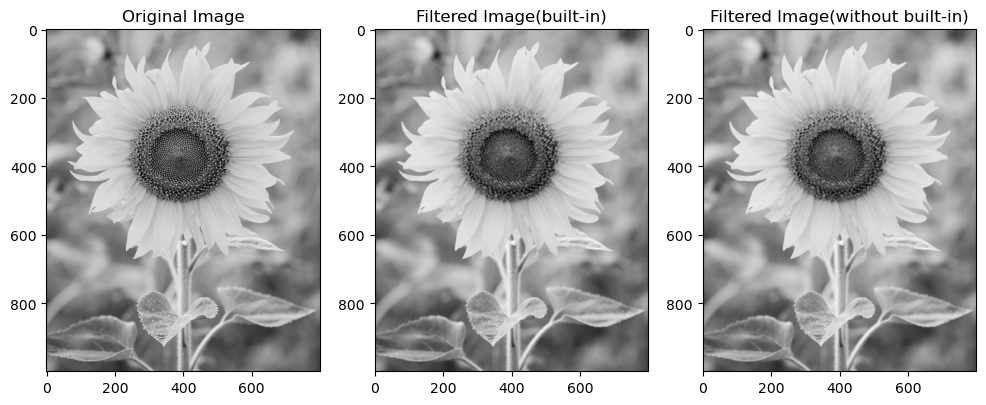

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_median(arr):
    n = len(arr)
    arr.sort()
    if n % 2 == 0:
        median = (arr[n // 2 - 1] + arr[n // 2]) / 2
    else:
        median = arr[n // 2]
    return median

def median_filter_custom(img, kernel_size):
    rows, cols = img.shape
    pad_size = kernel_size // 2
    padded_img = np.pad(img, pad_size, mode='constant', constant_values=0)
    
    modified_image = np.zeros((rows, cols))
    
    for i in range(rows):
        for j in range(cols):
            neighbours = []
            for p in range(-pad_size, pad_size + 1):
                for q in range(-pad_size, pad_size + 1):
                    neighbours.append(padded_img[i + pad_size + p, j + pad_size + q])
                    
            modified_image[i, j] = find_median(neighbours)
    
    return modified_image


original_image = cv2.imread('sunflower.jfif')
if original_image is None:
    print("Failed to load image")
else:
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    kernel_size = int(input("Enter kernel size :: "))
    filtered_image1 =  cv2.medianBlur(gray_image, kernel_size)
    filtered_image2 = median_filter_custom(gray_image, kernel_size)


    plt.figure(figsize=(12, 8))
    plt.subplot(1, 3, 1)
    plt.imshow(gray_image, cmap = 'gray')
    plt.title("Original Image")

    plt.subplot(1, 3, 2)
    plt.imshow(filtered_image1, cmap = 'gray')
    plt.title("Filtered Image(built-in)")
    
    plt.subplot(1, 3, 3)
    plt.imshow(filtered_image2, cmap = 'gray')
    plt.title("Filtered Image(without built-in)")